### Index Number: 10201100109
### Course: Machine Learning
### Program: Computer Science
### Customer Segmentation: Clustering

### Importing Libraries

In [1]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For plotting graphs and charts
import seaborn as sns             # For advanced data visualization
from sklearn.cluster import KMeans                 # For K-means clustering
from sklearn.metrics import silhouette_score       # For silhouette score evaluation
import plotly.express as px
import datetime as dt

import warnings
warnings.filterwarnings('ignore')



### Reading the Dataset

In [2]:
# Importing the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# Display the first few rows of the dataset to inspect its structure
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Exploring the Dataset

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    224

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# Checking for Duplicate Values
df.duplicated().sum().max()

0

In [6]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
df.describe()


Summary Statistics for Numerical Features:


ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
# Summary of categorical features
print("\nSummary of Categorical Features:")
(df.describe(include='object'))


Summary of Categorical Features:


Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

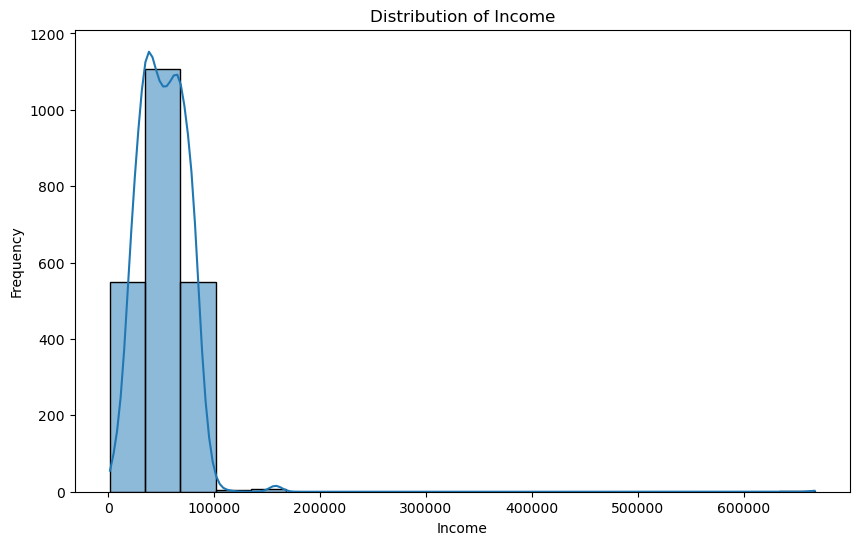

In [8]:
# Visualize distributions of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

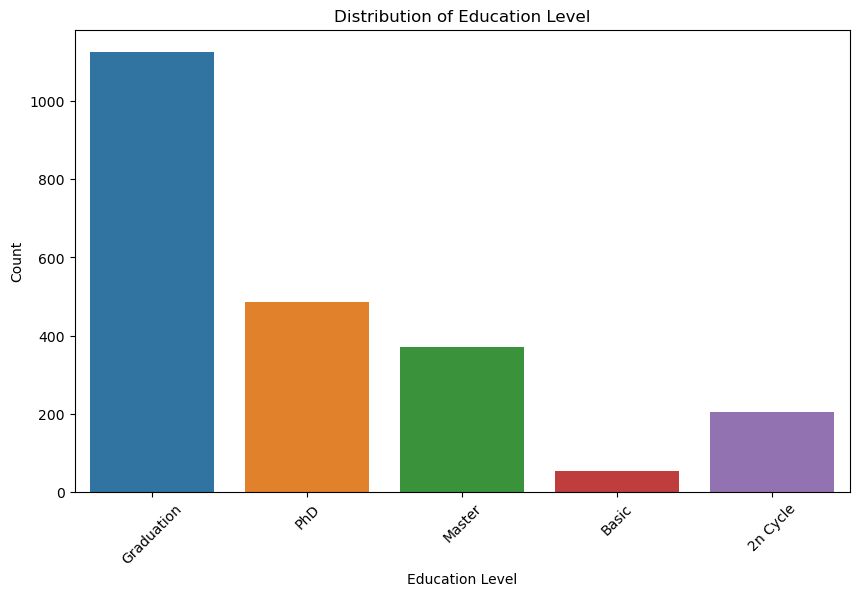

In [9]:
# Visualize distributions of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Cleaning Data (Removing Null Values)

In [10]:
# Record the total number of data points before removing null values
total_data_points_before = df.shape[0]

# Drop rows with missing values in the 'Income' column
df.dropna(subset=['Income'], inplace=True)

# Record the number of data points after removing null values
total_data_points_after = df.shape[0]

# Display the total number of data points before and after removing null values
print(f"Total Data Points Before Removing Null Values: {total_data_points_before}")
print(f"Total Data Points After Removing Null Values: {total_data_points_after}")


Total Data Points Before Removing Null Values: 2240
Total Data Points After Removing Null Values: 2216


In [11]:
# Check to make sure all null values are gone
total_null_values = df.isnull().sum().max()

# Display the total number of null values in the dataset
print("Total Number of Null Values:")
print(total_null_values)

Total Number of Null Values:
0


### Feature Engineering

#### Age of Customers

##### From the general information provided on the dataset, customer registration is said to have been made between 2012 and 2014, therefore it's safe to assume that the data was collected in January 2015 for the sake of simplicity.

In [12]:
# Calculate the age of the customers
current_year = 2015
df['Age'] = current_year - df['Year_Birth']

# Display the first few rows to verify the calculation
print(df[['Year_Birth', 'Age']].head())

   Year_Birth  Age
0        1957   58
1        1954   61
2        1965   50
3        1984   31
4        1981   34


#### Months since registration

##### Now we'll have to calculate how many months the customer has been with the company

In [13]:
# Convert 'Dt_Customer' column to datetime format with correct date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Calculate the number of months since registration
df['Months_Since_Registration'] = 12.0 * (2015 - df['Dt_Customer'].dt.year) + (1 - df['Dt_Customer'].dt.month)

# Display the first few rows to verify the calculation
print(df[['Dt_Customer', 'Months_Since_Registration']].head())


  Dt_Customer  Months_Since_Registration
0  2012-09-04                       28.0
1  2014-03-08                       10.0
2  2013-08-21                       17.0
3  2014-02-10                       11.0
4  2014-01-19                       12.0


#### Total expenditures

##### Since customer expenses are provided separately for different products, we'll be adding them up to get their total amount spent.

In [14]:
# Sum up the expenses across all product categories
df['Total_Expenditure'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Display the first few rows to verify the calculation
print(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Expenditure']].head())


   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  Total_Expenditure  
0            88               1617  
1             6                 27  
2            42                776  
3             5                 53  
4            15                422  


#### Age Groups

##### By Age, we'll be dividing the customers into different age groups.

In [15]:
# Create 'Age_Group' column based on age ranges
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'Age_Group'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age'] <= 39), 'Age_Group'] = 'Young Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'Age_Group'] = 'Middle Age Adult'
df.loc[df['Age'] >= 60, 'Age_Group'] = 'Senior Adult'

# Display the first few rows to verify the age groups
print(df[['Age', 'Age_Group']].head())


   Age         Age_Group
0   58  Middle Age Adult
1   61      Senior Adult
2   50  Middle Age Adult
3   31       Young Adult
4   34       Young Adult


#### Number of Children

##### Since information is provided separately for children and other younglins (slight star wars reference) in the home of each customer, we'll be adding them up, as they can be better represented as the number of children in the household.

In [16]:
# Calculate the total number of children in each household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Display the first few rows to verify the calculation
print(df[['Kidhome', 'Teenhome', 'Total_Children']].head())


   Kidhome  Teenhome  Total_Children
0        0         0               0
1        1         1               2
2        0         0               0
3        1         0               1
4        1         0               1


#### Marital Status

##### The marital status column has different string values namely: 'Together', 'Married', 'Divorced', 'Widowed', 'Alone', 'Absurd' and 'YOLO'. since most of them fall into the same category, we'll be representing the customer's marital status based on two main categories namely: 'Partner' and 'Single'.

In [17]:
# Map marital status to 'Partner' and 'Single' categories
partner_statuses = ['Together', 'Married', 'YOLO']
df['Marital_Status_Group'] = df['Marital_Status'].apply(lambda x: 'Partner' if x in partner_statuses else 'Single')

# Display the first few rows to verify the mapping
print(df[['Marital_Status', 'Marital_Status_Group']].head())


  Marital_Status Marital_Status_Group
0         Single               Single
1         Single               Single
2       Together              Partner
3       Together              Partner
4        Married              Partner


#### Taking Care of Outliers

##### For our outliers, we'll be looking out our numerical features since they have a higher potential of affecting the efficiency of our model. 

##### The Features we'll be focusing on will be: 'Age', 'Income', 'Total Expenditure', and 'Number of Purchases'rs.

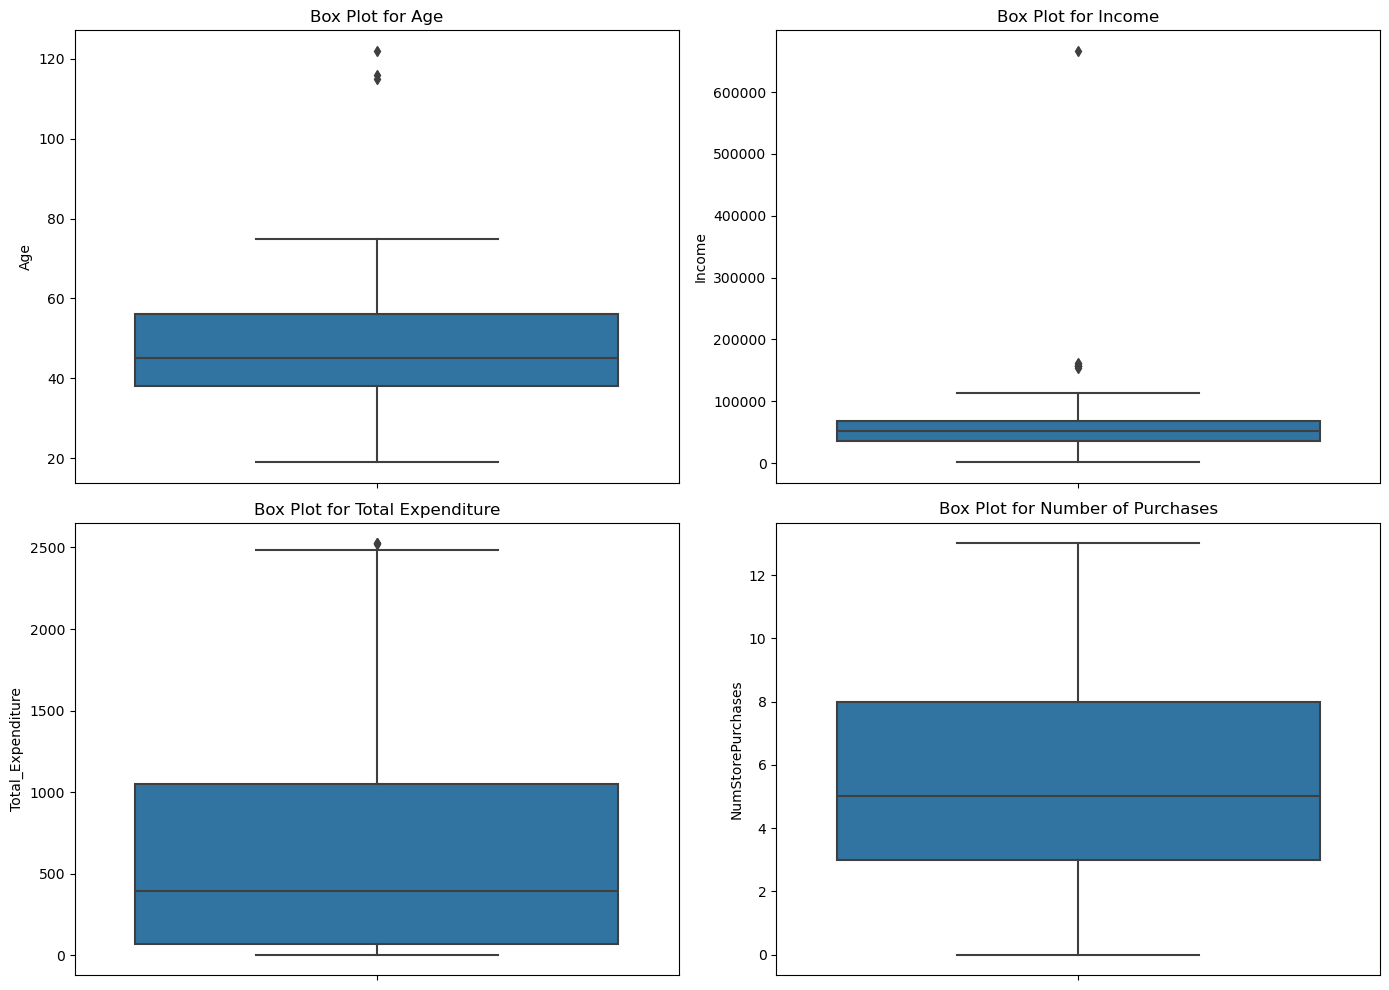

In [18]:
# Set up the figure and axes for box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Box plots for Age, Income, Total_Expenditure, and NumPurchases
sns.boxplot(y='Age', data=df, ax=axes[0, 0], orient='v')
axes[0, 0].set_title('Box Plot for Age')

sns.boxplot(y='Income', data=df, ax=axes[0, 1], orient='v')
axes[0, 1].set_title('Box Plot for Income')

sns.boxplot(y='Total_Expenditure', data=df, ax=axes[1, 0], orient='v')
axes[1, 0].set_title('Box Plot for Total Expenditure')

sns.boxplot(y='NumStorePurchases', data=df, ax=axes[1, 1], orient='v')
axes[1, 1].set_title('Box Plot for Number of Purchases')

# Adjust layout
plt.tight_layout()
plt.show()

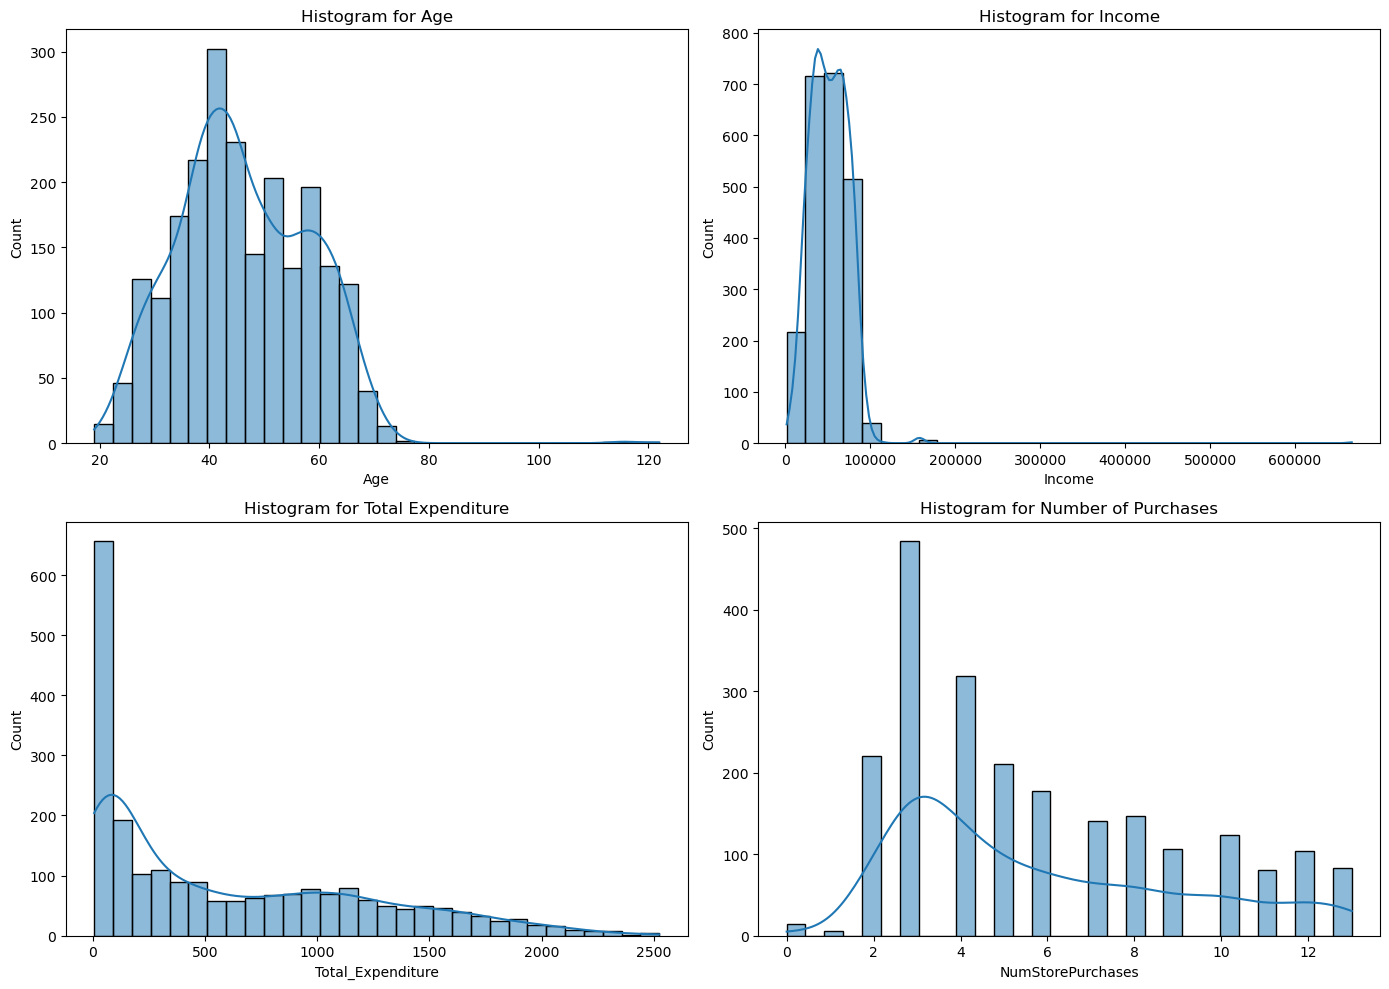

In [19]:
# Set up the figure and axes for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Histograms for Age, Income, Total_Expenditure, and NumPurchases
sns.histplot(df['Age'], ax=axes[0, 0], kde=True, bins=30)
axes[0, 0].set_title('Histogram for Age')

sns.histplot(df['Income'], ax=axes[0, 1], kde=True, bins=30)
axes[0, 1].set_title('Histogram for Income')

sns.histplot(df['Total_Expenditure'], ax=axes[1, 0], kde=True, bins=30)
axes[1, 0].set_title('Histogram for Total Expenditure')

sns.histplot(df['NumStorePurchases'], ax=axes[1, 1], kde=True, bins=30)
axes[1, 1].set_title('Histogram for Number of Purchases')

# Adjust layout
plt.tight_layout()
plt.show()


#### Observations:

##### AGE: There are some customers who are over 100 years old. This seems a bit unrealistic and is quite unlikely to happen. So we'll consider it as an outlier.

##### INCOME: There are some customers who earn more than 120,000 and some who earn more than 600,000. They are clearly outliers in the dataset.

##### TOTAL_EXPENDITURE: For the total expenditure, the only outliers is on the 2500 mark, but we'll let it slide since it's not extreme and follows a smooth trend. So we'll not consider it as an outlier.

##### NUMBER_OF_PURCHASES: This feature does not have any outliers in it.

In [20]:
# Remove outliers from the 'Age' column (age < 100) and 'Income' column (income < 120000)
df = df[df['Age'] < 100]
df = df[df['Income'] < 120000]

### Data Analysis (Visualizations)

#### Marital Status

In [21]:
# Compute the frequency of each marital status category
marital_status_counts = df['Marital_Status'].value_counts()

# Create a bar plot to visualize the distribution of marital status categories
fig = px.bar(x=marital_status_counts.index, y=marital_status_counts.values, 
             labels={'x': 'Marital Status', 'y': 'Frequency'}, 
             title='Distribution of Marital Status')

# Show the plot
fig.show()


In [22]:
# Count the number of customers in each marital status category
marital_status_counts = df['Marital_Status_Group'].value_counts().reset_index()
marital_status_counts.columns = ['Marital_Status_Group', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(marital_status_counts, 
             x='Marital_Status_Group', 
             y='Count',
             color='Marital_Status_Group',
             color_discrete_map={'Partner': 'skyblue', 'Single': 'lightgreen'},
             labels={'Marital_Status_Group': 'Marital Status', 'Count': 'Number of Customers'},
             title='Number of Customers by Marital Status')

# Update layout
fig.update_layout(title_x=0.5, xaxis_tickangle=0, yaxis_gridcolor='lightgray', plot_bgcolor='rgba(0,0,0,0)')

# Show plot
fig.show()

In [23]:
# Calculate average expenditure for each marital status category
average_expenditure_by_marital_status = df.groupby('Marital_Status_Group')['Total_Expenditure'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(average_expenditure_by_marital_status, 
             x='Marital_Status_Group', 
             y='Total_Expenditure',
             color='Marital_Status_Group',
             color_discrete_map={'Partner': 'skyblue', 'Single': 'lightgreen'},
             labels={'Marital_Status_Group': 'Marital Status', 'Total_Expenditure': 'Average Expenditure'},
             title='Average Expenditure by Marital Status')

# Update layout
fig.update_layout(title_x=0.5, xaxis_tickangle=-45, yaxis_gridcolor='lightgray', plot_bgcolor='rgba(0,0,0,0)')

# Show plot
fig.show()

#### Observation: 
##### Although single customers are far less in number than those in a relationship, they spend more money on average compared to customers in relationship. This could give us a slight prediction that individuals who are single are more likely to spend more due to being lonely or being irresponsible with their income (That is those in a relationship are more concious/responsible of how they spend their money).

#### Education Level

In [24]:
# Count the number of customers in each education level category
education_counts = df['Education'].value_counts().reset_index()
education_counts.columns = ['Education_Level', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(education_counts, 
             x='Education_Level', 
             y='Count',
             color='Education_Level',
             color_discrete_map={'Graduation': 'skyblue', 'PhD': 'lightgreen', 'Master': 'orange', '2n Cycle': 'purple', 'Basic': 'pink'},
             labels={'Education_Level': 'Education Level', 'Count': 'Number of Customers'},
             title='Distribution of Education Levels')

# Update layout
fig.update_layout(title_x=0.5, xaxis_tickangle=-45, yaxis_gridcolor='lightgray', plot_bgcolor='rgba(0,0,0,0)')

# Show plot
fig.show()


#### Observation:
##### Majority of customers are university graduates, with most of those graduates having PhD's.

#### Child Status

In [25]:
# Count the number of customers with different numbers of children
children_counts = df.Total_Children.value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(children_counts, 
             values= children_counts.values, 
             names= children_counts.index,
             color_discrete_sequence=px.colors.qualitative.Dark24,
             title='Distribution of Number of Children in the Household')

# Update layout
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(line=dict(color='white', width=2)))
fig.update_layout(title_x=0.5)

# Show plot
fig.show()

#### Average Spending: Child Status Wise

In [26]:
# Calculate the mean spending for each child status group
average_spending_child_status = df.groupby('Total_Children')['Total_Expenditure'].mean().reset_index()

# Rename the columns for better clarity
average_spending_child_status.columns = ['Number_of_Children', 'Average_Total_Expenditure']

# Create a bar chart using Plotly Express
fig = px.bar(average_spending_child_status, 
             x='Number_of_Children', 
             y='Average_Total_Expenditure',
             color='Number_of_Children',
             color_discrete_sequence=px.colors.qualitative.Dark24,
             title='Average Spending by Child Status',
             labels={'Number_of_Children': 'Number of Children', 'Average_Total_Expenditure': 'Average Total Expenditure'})

# Update layout
fig.update_layout(xaxis_title='Number of Children', yaxis_title='Average Total Expenditure', title_x=0.5)

# Show plot
fig.show()


#### Observations:
##### <b>a.</b> About 50% of customers have just one child, with 28% of customers having none, while 19% have just 2 and 2% have 3.

##### <b>b.</b> From the data, we can also see that customers who do not have children are more likely to spend their money than customers who have children. 

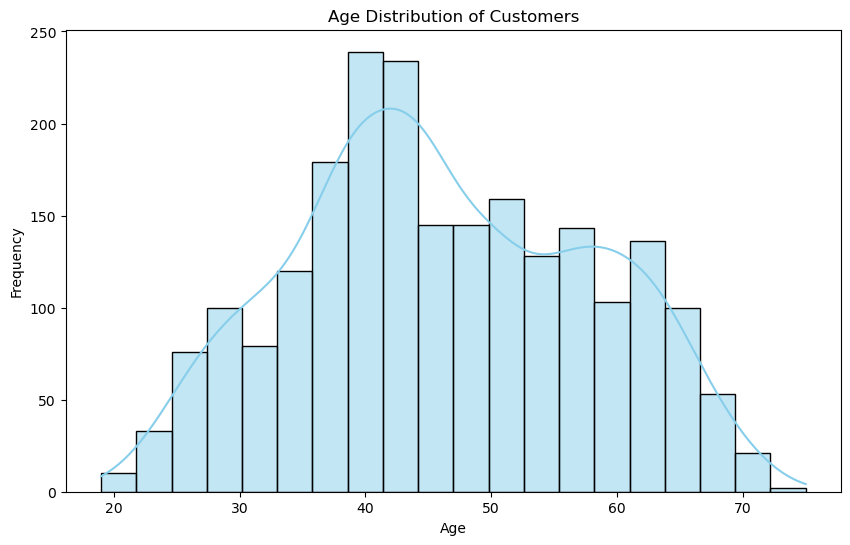

In [27]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram using seaborn
sns.histplot(df['Age'], bins=20, color='skyblue', edgecolor='black', kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')

# Show plot
plt.show()

#### Observation:
##### The customer age distribution is normally distributed

#### Relationship: Age vs Spendings

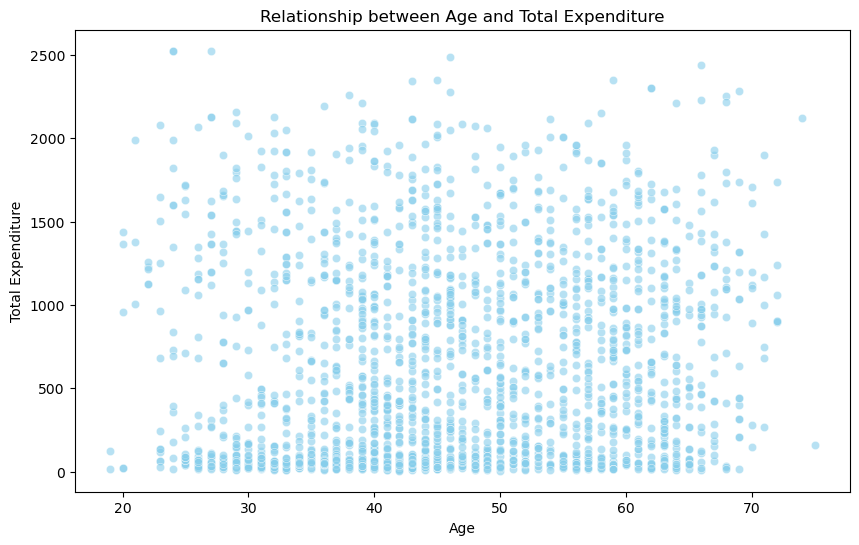

In [28]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the scatter plot using seaborn
sns.scatterplot(data=df, x='Age', y='Total_Expenditure', color='skyblue', alpha=0.6)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Total Expenditure')
plt.title('Relationship between Age and Total Expenditure')

# Show plot
plt.show()

#### Observation:
##### There really aren't any clear relationships between the customers age and their shopping habits.

#### Customers Segmentation: Age Group Wise

In [29]:
# Group customers by age group and calculate total expenditure
age_group_expenditure = df.groupby('Age_Group')['Total_Expenditure'].sum().reset_index()

# Sort the DataFrame by total expenditure in descending order
age_group_expenditure = age_group_expenditure.sort_values(by='Total_Expenditure', ascending=False)

# Create bar chart with Plotly Express
fig = px.bar(age_group_expenditure, x='Age_Group', y='Total_Expenditure', 
             color='Age_Group', color_discrete_sequence=px.colors.qualitative.Safe,
             labels={'Total_Expenditure': 'Total Expenditure', 'Age_Group': 'Age Group'})

# Update layout
fig.update_layout(title='Total Expenditure by Age Group',
                  xaxis_title='Age Group',
                  yaxis_title='Total Expenditure')

# Show the plot
fig.show()

In [30]:
# Group customers by age group and calculate summary statistics
age_group_summary = df.groupby('Age_Group')['Total_Expenditure'].agg(['mean', 'median', 'sum']).reset_index()

# Filter out 'Teen' age group if it contributes less than 5% of total expenditure
teen_contribution = age_group_summary[age_group_summary['Age_Group'] == 'Teen']['sum'].values[0]
total_expenditure = age_group_summary['sum'].sum()
if teen_contribution / total_expenditure < 0.05:
    age_group_summary = age_group_summary[age_group_summary['Age_Group'] != 'Teen']

# Create a donut chart
fig = px.pie(age_group_summary, 
             values='sum', 
             names='Age_Group', 
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout
fig.update_layout(title='Total Expenditure by Age Group',
                  annotations=[dict(text='Age Groups', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Show the chart
fig.show()


#### Average Spendings: Age Group Wise

In [31]:
# Group customers by age group and calculate the average spending
average_spending_age_group = df.groupby('Age_Group')['Total_Expenditure'].mean().reset_index()

# Sort the DataFrame by average spending in descending order
average_spending_age_group = average_spending_age_group.sort_values(by='Total_Expenditure', ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(average_spending_age_group, 
             x='Age_Group', 
             y='Total_Expenditure',
             color='Age_Group',
             color_discrete_sequence=px.colors.qualitative.Dark24,
             title='Average Spending by Age Group',
             labels={'Age_Group': 'Age Group', 'Total_Expenditure': 'Average Total Expenditure'})

# Update layout
fig.update_layout(xaxis_title='Age Group', 
                  yaxis_title='Average Total Expenditure', 
                  title_x=0.5)

# Show the chart
fig.show()


#### Observation:

##### <b>a.</b> Majority of customers are middle aged, followed by young adults, senior adult, and lastly teenagers.

##### <b>b.</b> Althoguh middle aged customers have the highest expenditure, on average, senior adults tend to spend more.

#### Income Distribution of Customers

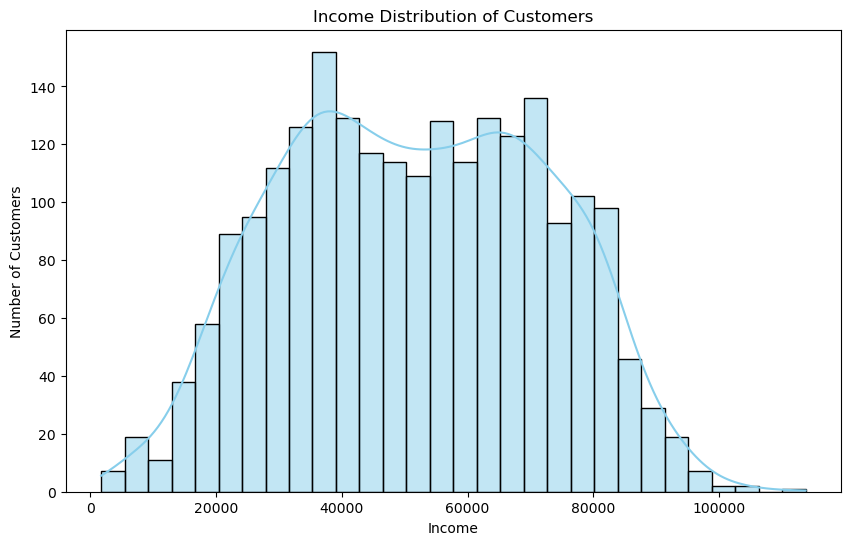

In [32]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram using seaborn
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Income Distribution of Customers')

# Show plot
plt.show()

#### Observation:
##### The income distribution of customer is normally distributed.

#### Relationship: Income vs Spendings

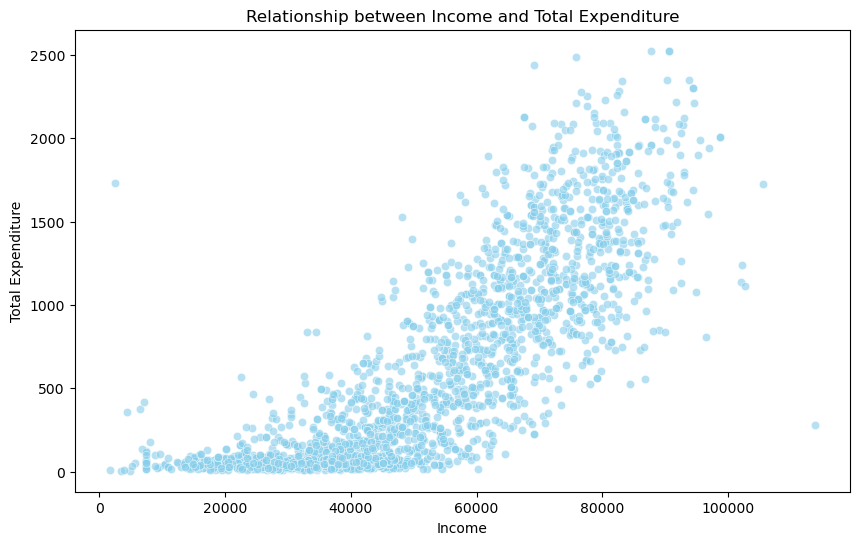

In [33]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the scatter plot using seaborn
sns.scatterplot(data=df, x='Income', y='Total_Expenditure', color='skyblue', alpha=0.6)

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Total Expenditure')
plt.title('Relationship between Income and Total Expenditure')

# Show plot
plt.show()

#### Observation:
##### From the scatter plot we can see that the relationship between income and total expenditure is linear. There we can conclude that customers who have a higher salary spend more.

#### Most Bought Products


In [34]:
# Calculate the mean spending on each product category
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

# Create the bar plot using Plotly Express with distinct colors for each product category
fig = px.bar(product_means_df, x='Product', y='Average Spending', 
             title='Average Spending on Products', 
             labels={'Product': 'Product', 'Average Spending': 'Average Spending'},
             color='Product')  # Set color parameter to 'Product' for distinct colors

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

fig.show()

#### Observation:
##### Wine and meat products are the most bought, with sweet products and fruits being the least bought.

### Creating the Machine Learning Model
#### To create our ideal machine learning model, we'll be removing unneccessary columns especially the categorical features, and we'll focus mainly on the following numerical features to help in the creation of our model and how it affects our clusters:  
##### <b>-</b>Income
##### <b>-</b>Total_Expenditure
##### <b>-</b>Total_Children
##### <b>-</b>Age
##### <b>-</b>Months_Since_Registration

In [35]:
X = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Recency',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
             'Age_Group', 'Marital_Status_Group'], axis=1)


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2205 non-null   float64
 1   Age                        2205 non-null   int64  
 2   Months_Since_Registration  2205 non-null   float64
 3   Total_Expenditure          2205 non-null   int64  
 4   Total_Children             2205 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 103.4 KB


#### Optimum Clusters Using Elbow Method


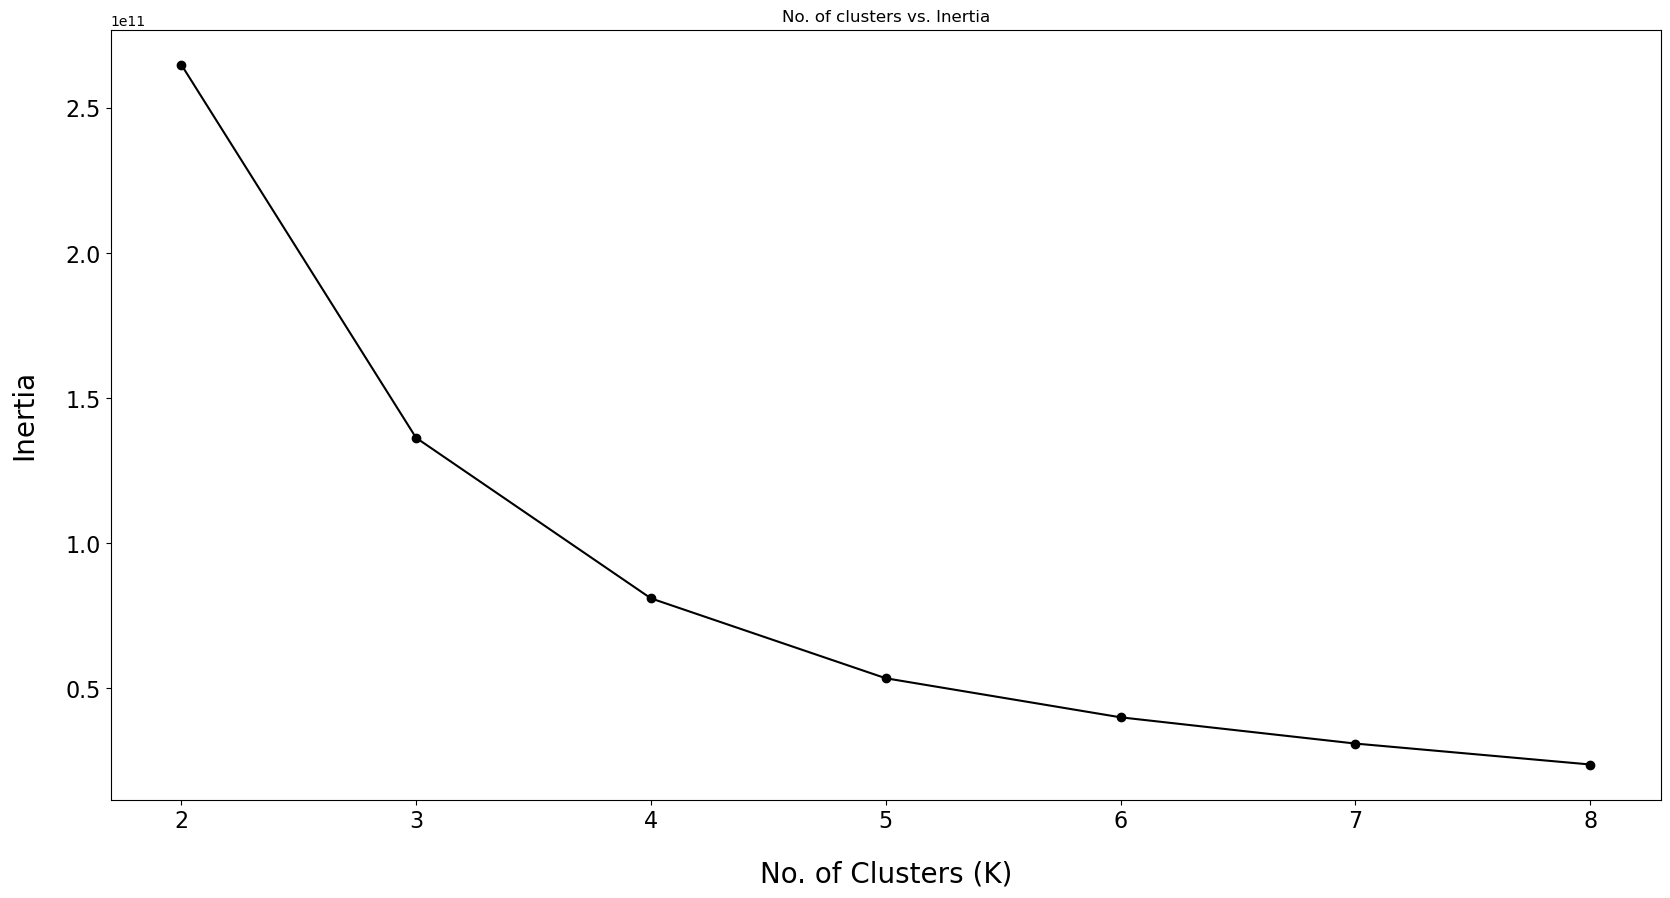

In [37]:
options = range(2, 9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20, 10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20)
plt.show()

#### Observation:
##### Based on the plot above we will group the customers into 4 clusters, because the inertia value does not decrease much after 4 clusters.

In [38]:
# Initialize KMeans model with 4 clusters
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the model to the data and predict cluster labels
cluster_labels = kmeans_model.fit_predict(X)

# Create a copy of the original DataFrame
customer_clusters = X.copy()

# Add cluster labels to the DataFrame
customer_clusters['Cluster_Labels'] = cluster_labels


#### Checking Clusters in Income

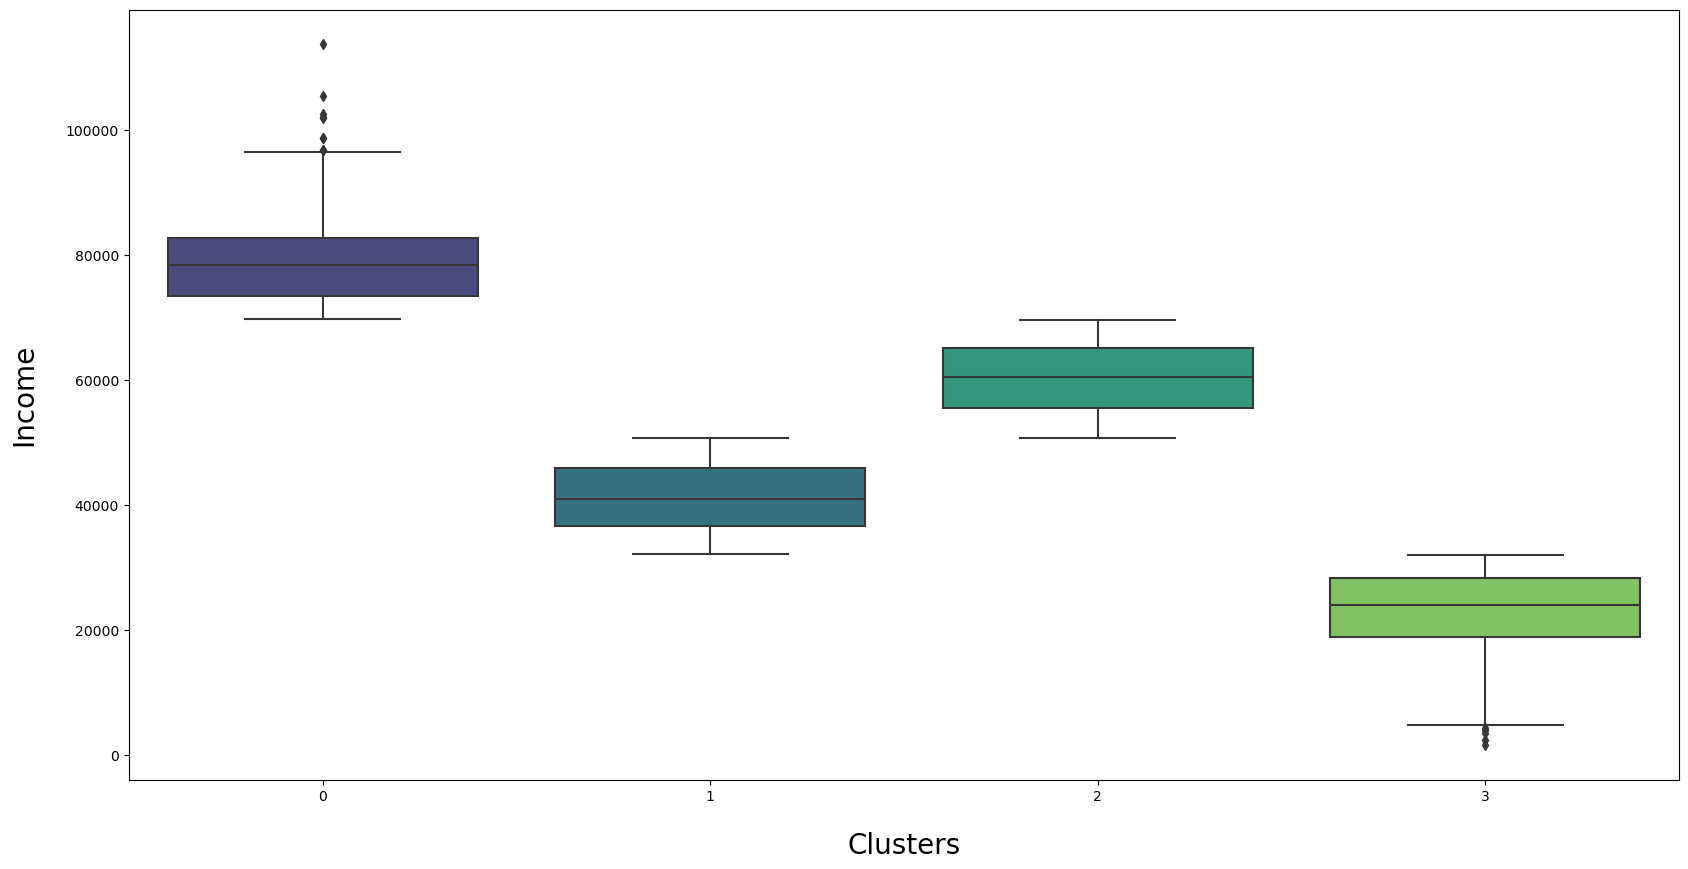

In [39]:
# Setting up the figure size
plt.figure(figsize=(20,10))

# Creating a boxplot to visualize the clusters in the 'Income' column
sns.boxplot(data=customer_clusters, x='Cluster_Labels', y='Income', palette='viridis')

# Adding labels to the plot
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)

# Displaying the plot
plt.show()

#### Checking Clusters in Age

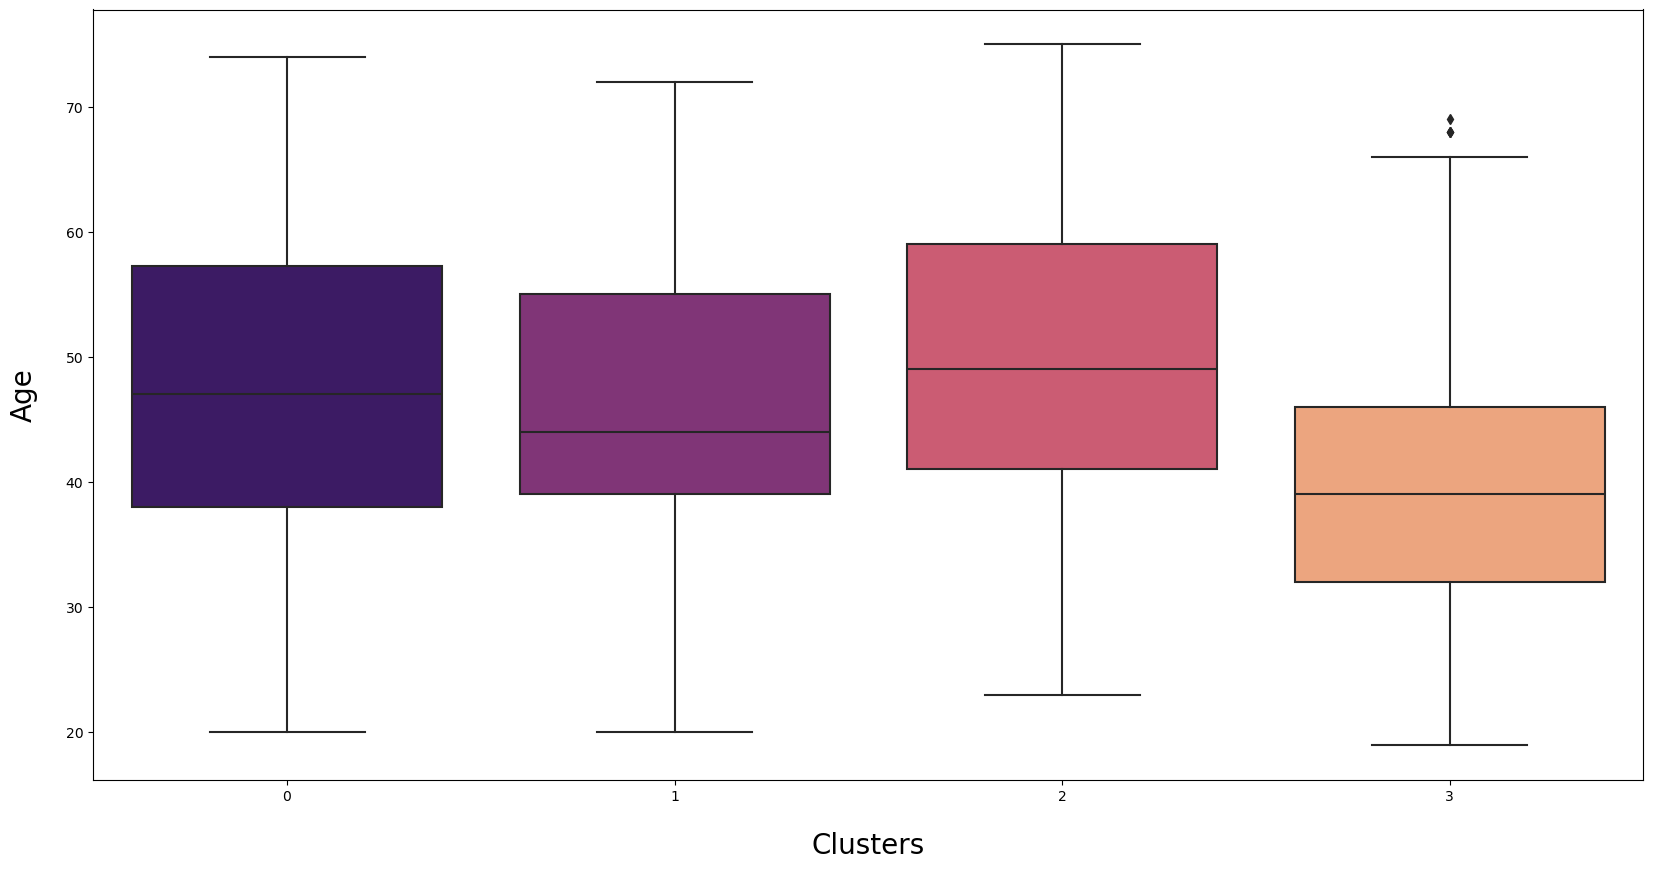

In [40]:
# Setting up the figure size
plt.figure(figsize=(20,10))

# Creating a boxplot to visualize the clusters in the 'Age' column
sns.boxplot(data=customer_clusters, x='Cluster_Labels', y='Age', palette='magma')

# Adding labels to the plot
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20)

# Displaying the plot
plt.show()


#### Checking Clusters in Months_Since_Registration

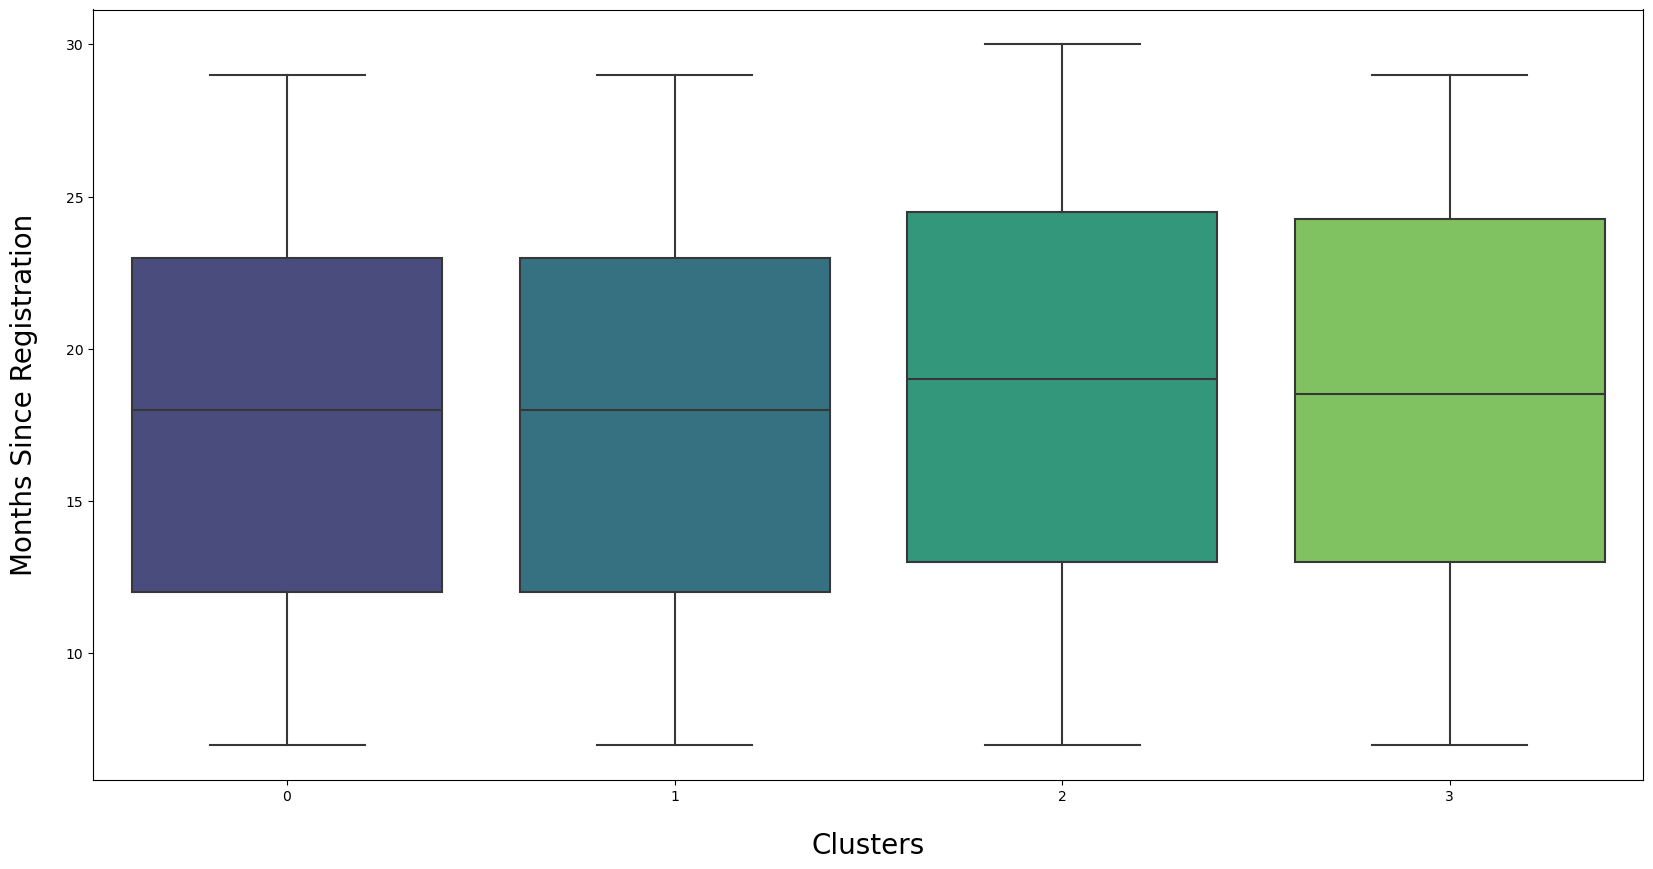

In [41]:
# Setting up the figure size
plt.figure(figsize=(20,10))

# Creating a boxplot to visualize the clusters in the 'Months_Since_Registration' column
sns.boxplot(data=customer_clusters, x='Cluster_Labels', y='Months_Since_Registration', palette='viridis')

# Adding labels to the plot
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Months Since Registration', fontsize=20, labelpad=20)

# Displaying the plot
plt.show()


#### Checking Clusters in Total_Expenditure

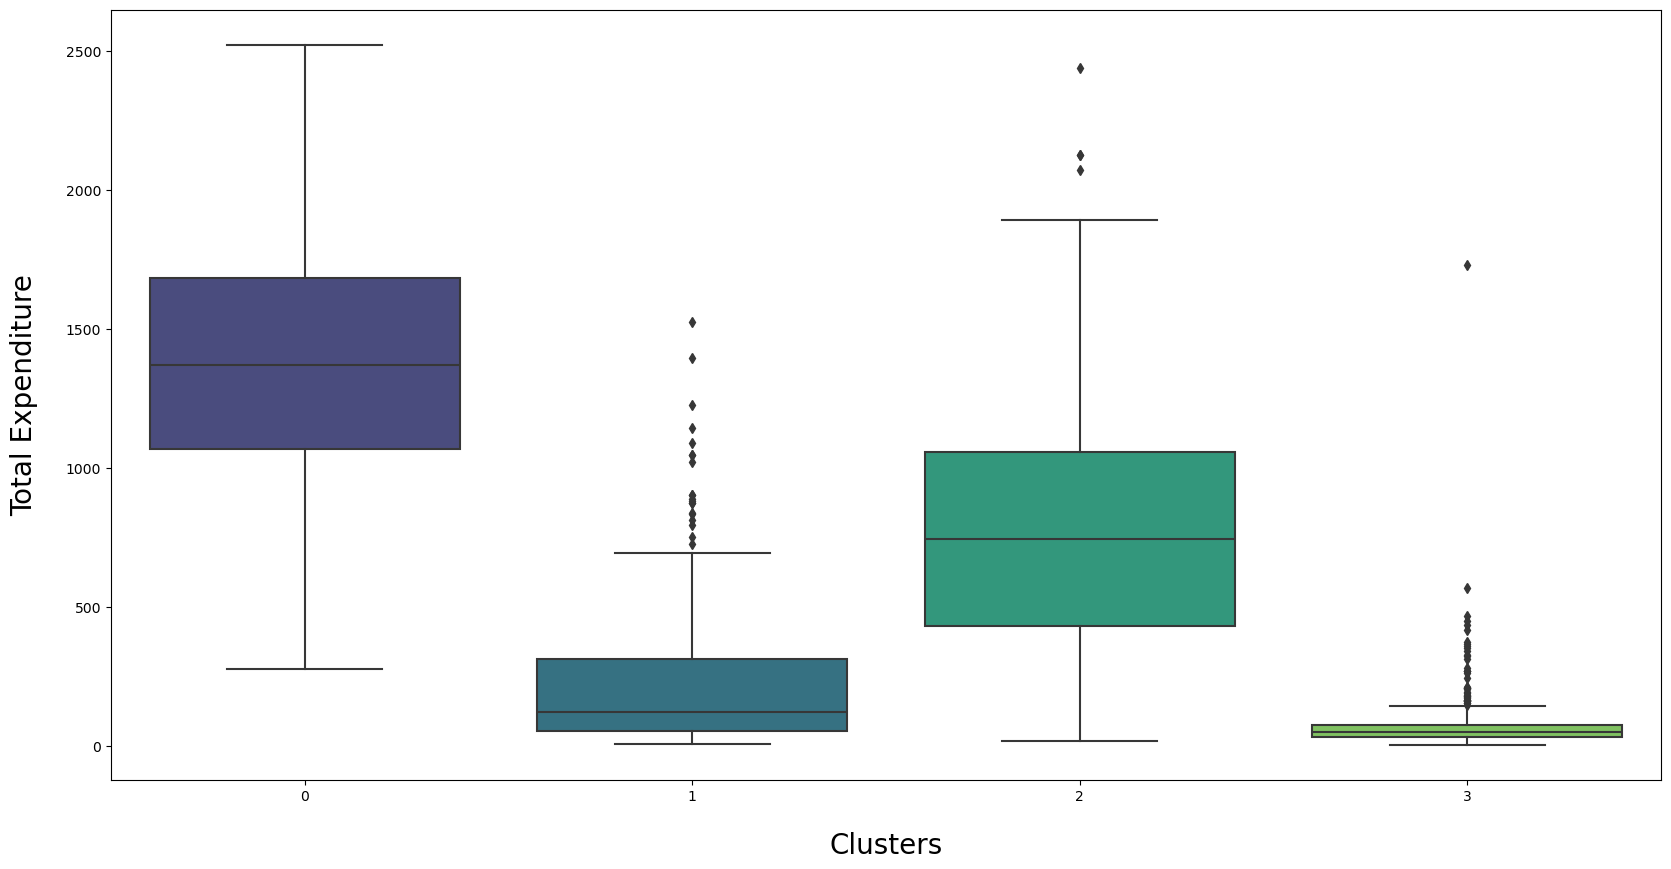

In [42]:
# Setting up the figure size
plt.figure(figsize=(20,10))

# Creating a boxplot to visualize the clusters in the 'Total_Expenditure' column
sns.boxplot(data=customer_clusters, x='Cluster_Labels', y='Total_Expenditure', palette='viridis')

# Adding labels to the plot
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Total Expenditure', fontsize=20, labelpad=20)

# Displaying the plot
plt.show()

#### Cheking Clusters in Total_Children

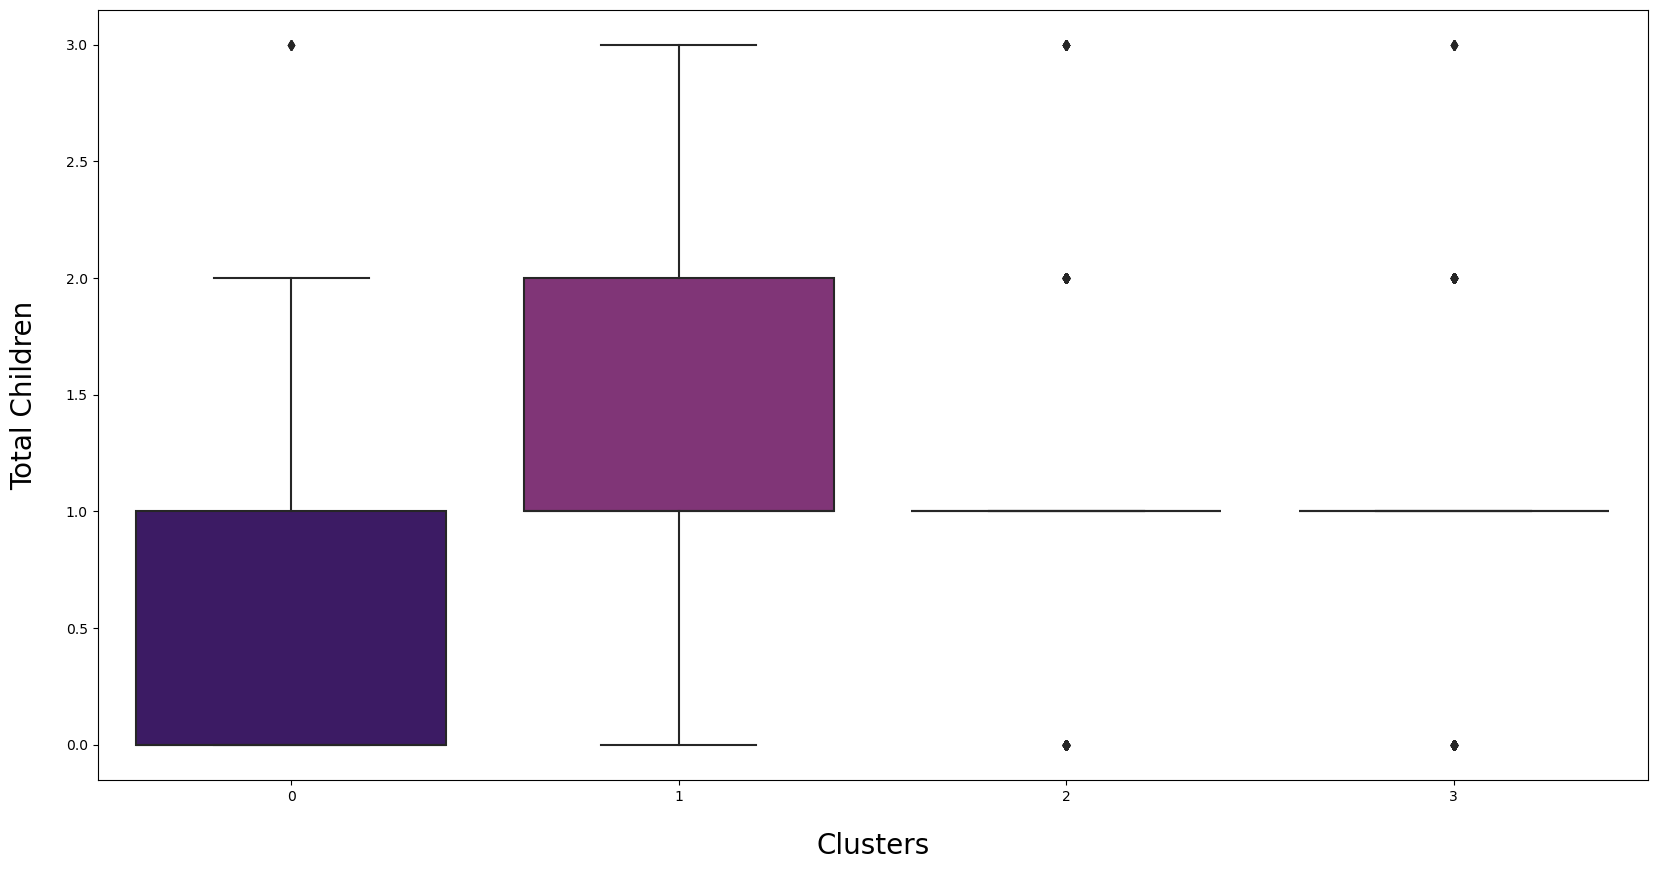

In [43]:
# Setting up the figure size
plt.figure(figsize=(20,10))

# Creating a boxplot to visualize the clusters in the 'Total_Children' column
sns.boxplot(data=customer_clusters, x='Cluster_Labels', y='Total_Children', palette='magma')

# Adding labels to the plot
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Total Children', fontsize=20, labelpad=20)

# Displaying the plot
plt.show()


#### Observation:

##### From our observation, we can see that from our features of interest, we can group our customers into 4 groups based on their income and total expenditures. Just for fun, we'll be using the ranking method in popular mobile video game "Skullgirls" since it has 4 distinct tiers/levels, namely: 
##### <b>Diamond:</b> Will be used for customers with the higest income and expenditure
##### <b>Gold:</b> Will be used for customers with high income and expenditure
##### <b>Silver:</b> Will be used for customers low income and expenditure
##### <b>Bronze:</b> Will be used for customers lowest income and expenditure

### Exploring the Cluster Data

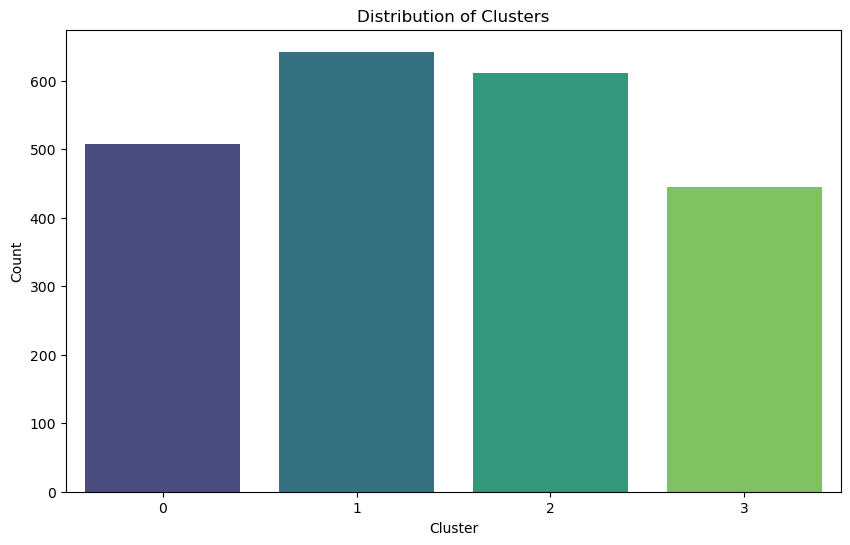

In [44]:
# Plot countplot for clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_clusters, x='Cluster_Labels', palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

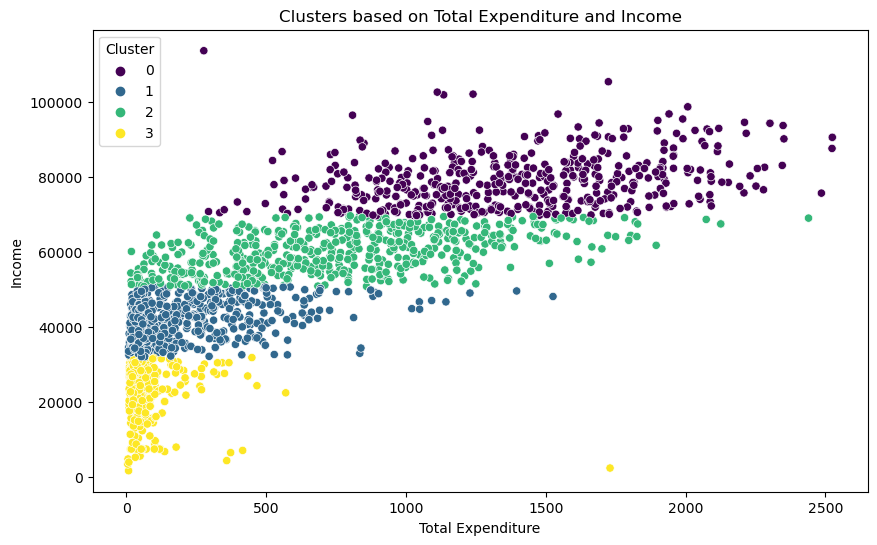

In [45]:
# Plot scatter plot for income and total expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_clusters, x='Total_Expenditure', y='Income', hue='Cluster_Labels', palette='viridis')
plt.title('Clusters based on Total Expenditure and Income')
plt.xlabel('Total Expenditure')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

### Observation:
##### So from the bar chart and scatter plot, we can see that:
##### <b>*</b> Cluster 0 has the highest income and expenditure although it has the 3 higest number of counts. So we'll be giving it the Diamond Tier

##### <b>*</b> Cluster 2 although having the 2nd higest amount of counts, ranks second when it comes to income and expenditure, therefore we'll be giving it the Gold Tier.

##### <b>*</b> Cluster 1 has the highest amount of counts, but ranks third in income and expenditure, therefore we'll be putting it in the Silver Tier.

##### <b>*</b> Lastly Cluster 3 has the least number of counts, and also ranks last in income and expenditure, therefore it will get the Bronze Tier.

In [46]:
# Replace cluster labels with Skullgirls tier names
customer_clusters['Customer_Labels'] = customer_clusters['Cluster_Labels'].replace({0: 'Diamond', 1: 'Silver', 2: 'Gold', 3: 'Bronze'})

# Assign the modified cluster labels to the original DataFrame
df['Customer_Labels'] = customer_clusters['Customer_Labels']


In [47]:
# Define custom colors for each cluster
colors = {'Diamond': '#F433FF', 'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'}

# Calculate the counts of customers in each tier
tier_counts = df['Customer_Labels'].value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(x=tier_counts.index, y=tier_counts.values, 
             color=tier_counts.index, color_discrete_map=colors,
             labels={'x':'Tier', 'y':'Number of Customers'}, 
             title='Distribution of Customers Across Tiers')

# Update bar chart layout
fig.update_layout(xaxis_title='Tier', yaxis_title='Number of Customers', 
                  title_font_size=24, xaxis={'categoryorder':'total descending'})
fig.show()


#### Observation:
##### From the graph we can see that the majority of customers fall in the silver and gold tiers, with bronze having the least amount of customers.

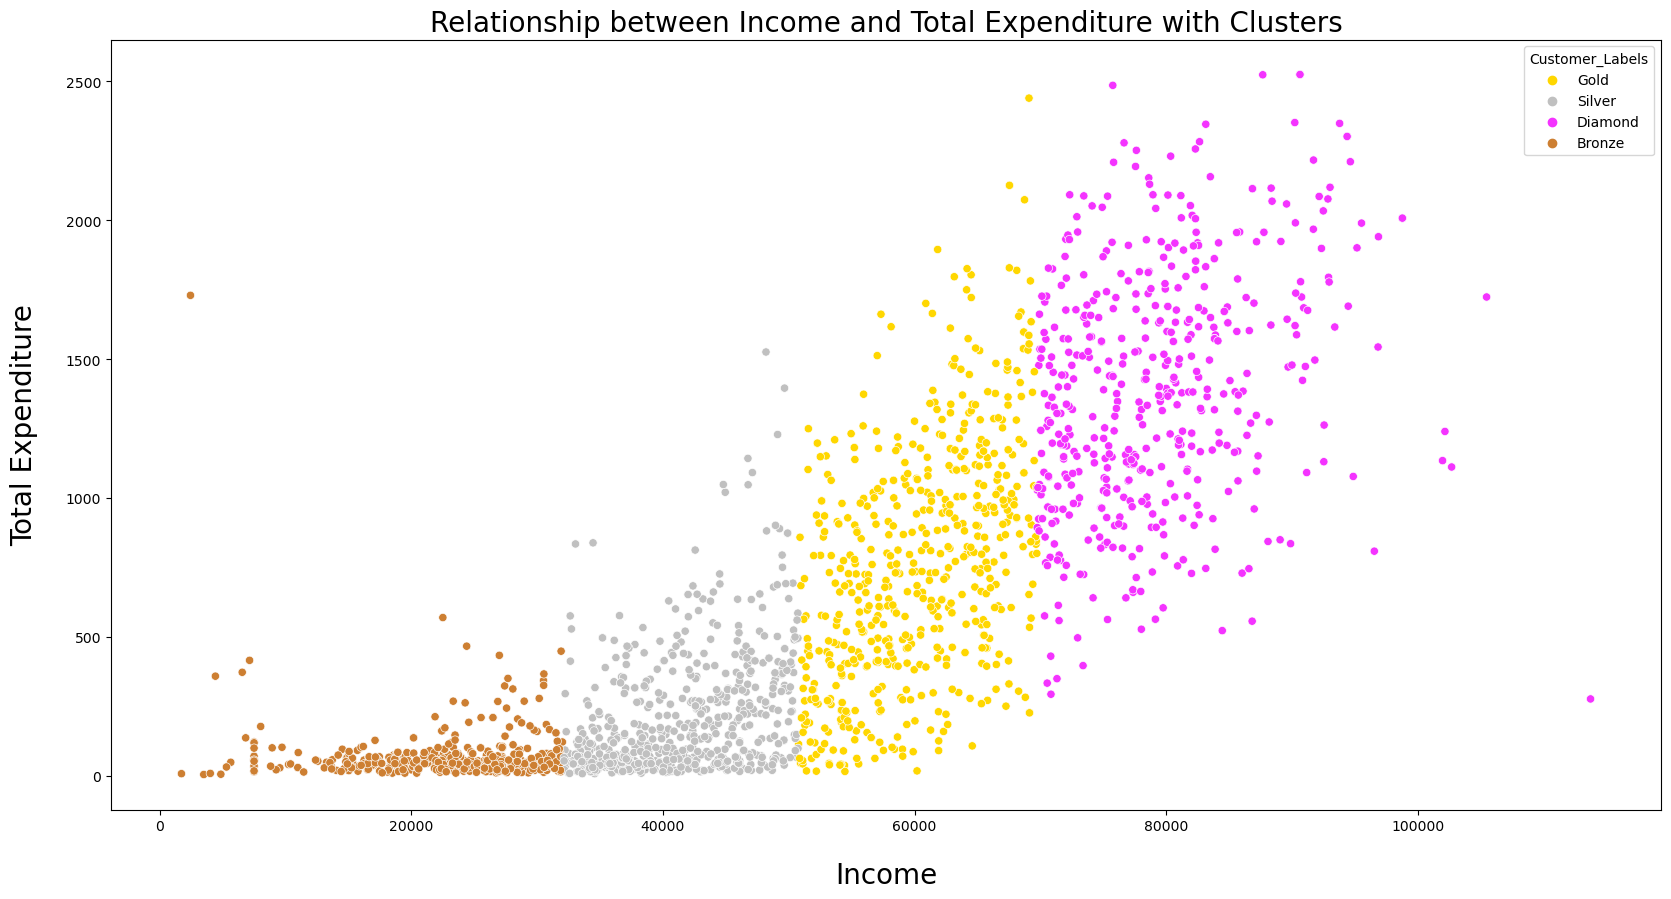

In [48]:
# Define custom color palette
custom_palette = {'Diamond': '#F433FF', 'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'}

# Set up the figure and axis
plt.figure(figsize=(20, 10))

# Create the scatter plot using seaborn and the custom palette
sns.scatterplot(data=df, x='Income', y='Total_Expenditure', hue='Customer_Labels', palette=custom_palette)

# Add labels and title
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Expenditure', fontsize=20, labelpad=20)
plt.title('Relationship between Income and Total Expenditure with Clusters', fontsize=20)

# Show plot
plt.show()


#### Observation:
##### As expected, the highest earners are most likely to be the highest spenders.

<Figure size 2000x1000 with 0 Axes>

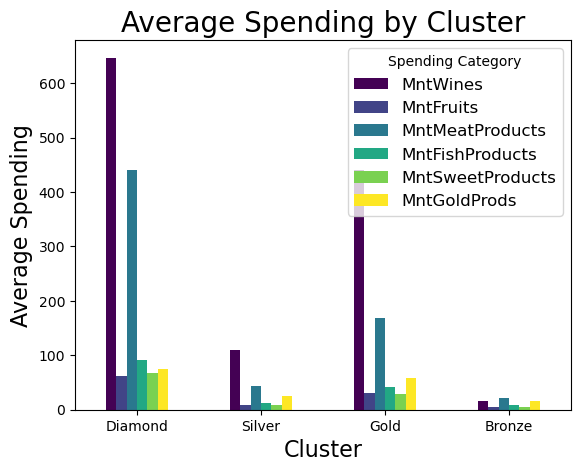

In [49]:
# Define the categories of spending
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the average spending for each category by cluster
average_spending_by_cluster = df.groupby(customer_clusters['Cluster_Labels'])[spending_categories].mean()

# Map cluster labels to their corresponding names
cluster_names = {0: 'Diamond', 1: 'Silver', 2: 'Gold', 3: 'Bronze'}

# Rename the index (cluster labels) with their corresponding names
average_spending_by_cluster.index = average_spending_by_cluster.index.map(cluster_names)

# Plot the bar chart
plt.figure(figsize=(20, 10))
average_spending_by_cluster.plot(kind='bar', colormap='viridis')
plt.title('Average Spending by Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Average Spending', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Spending Category', fontsize=12)
plt.show()


#### Observation:
##### With the exception of the bronze tier, majority of the customers spent most of their money on wine products.

<Figure size 2000x1000 with 0 Axes>

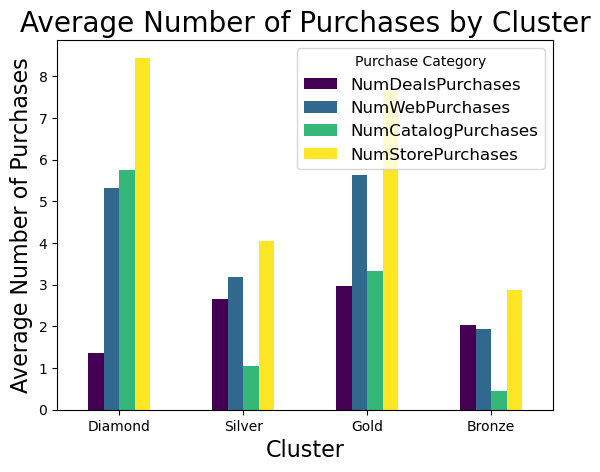

In [50]:
# Define the categories of purchases
purchase_categories = ['NumDealsPurchases', 'NumWebPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases']

# Calculate the average number of purchases for each category by cluster
average_purchases_by_cluster = df.groupby(customer_clusters['Cluster_Labels'])[purchase_categories].mean()

# Map cluster labels to their corresponding names
cluster_names = {0: 'Diamond', 1: 'Silver', 2: 'Gold', 3: 'Bronze'}

# Rename the index (cluster labels) with their corresponding names
average_purchases_by_cluster.index = average_purchases_by_cluster.index.map(cluster_names)

# Plot the bar chart
plt.figure(figsize=(20, 10))
average_purchases_by_cluster.plot(kind='bar', colormap='viridis')
plt.title('Average Number of Purchases by Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Average Number of Purchases', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Purchase Category', fontsize=12)
plt.show()


#### Observation:
##### On average, the majority of customers like to make store purchases.

<Figure size 2000x1000 with 0 Axes>

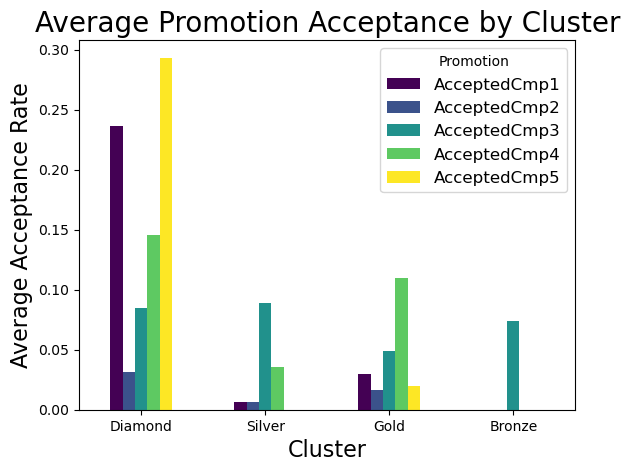

In [51]:
# Define the promotion acceptance columns
promotion_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                     'AcceptedCmp4', 'AcceptedCmp5']

# Calculate the average acceptance rate for each promotion by cluster
average_acceptance_by_cluster = df.groupby(customer_clusters['Cluster_Labels'])[promotion_columns].mean()

# Map cluster labels to their corresponding names
cluster_names = {0: 'Diamond', 1: 'Silver', 2: 'Gold', 3: 'Bronze'}

# Rename the index (cluster labels) with their corresponding names
average_acceptance_by_cluster.index = average_acceptance_by_cluster.index.map(cluster_names)

# Plot the bar chart
plt.figure(figsize=(20, 10))
average_acceptance_by_cluster.plot(kind='bar', colormap='viridis')
plt.title('Average Promotion Acceptance by Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Average Acceptance Rate', fontsize=16)
plt.xticks(rotation=0)
plt.legend(title='Promotion', fontsize=12)
plt.show()


#### Observations: 
##### So from the chart we can see that customers in the Diamond Tier are more likely to receive promotion advertisements or campaigns from the store company since ther are the obvious big spenders.